In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


In [12]:

## ====== setting parameters =======

#S = S_linear_space(x, T)
    
V, D, L = 0.5, 0.5, 5


# for S in S_vec:
#     print(S)

Nt_gaps = 30000    # number of timesteps
#T = 10*2*np.pi + (np.pi)/2       # final time - we're interested in time as it gets large  
T = 10*np.pi

Nt_points = Nt_gaps + 1

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 100; #number of spaces in x direction
Nx_points = Nx_spaces + 1 

#0 dirichlet B.C's - no sand at either end of the belt
dir0 = 0.0  # u(0,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

length = 5 #default conveyor length
#Set up spacial points for exact solution
N_dots = 50

In [13]:

## ===== defining our functions =====

#Allows us to change the length if needed 
def scale(L):
    x_pde = np.linspace(0, L, Nx_points) #mesh points in space
    dx = x_pde[1] - x_pde[0]
    dt = t[1] - t[0]
    return x_pde, dx, dt

#Function for setting initial conditions in spacePP
def I(x): # initial u(x,0) = 0, dump sand at all x, assume we start with no sand
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    return i_x

#Function for source term as a constant
def S_constant(x, t):
    constant_rate = 1.0
    return constant_rate

#Function for exact solution
def exact(s, V, D, L):
    x = np.linspace(0, L, N_dots+1)
    M = np.size(x)
    u_ex = np.zeros(M) 
    for i in range(1,M-1):
        beta = (s*L)/(V*(1-np.exp((V*L)/D)))
        u_ex[i] = beta*(np.exp((V/D)*x[i])-1) + (s/V)*x[i]
    return x, u_ex


xLo, xHi = 0, 5
def S_linear_space(x, t):
    if xLo < x < xHi:
        return 5.0/(xHi-xLo)
    else:
        return 0.0
    
def S_linear_space(x, t):
    if xLo < x < xHi:
        return 5.0/(xHi-xLo)
    else:
        return 0.0




In [140]:
S_linear_space([5.0, 9], t)

array([1., 1.])

In [14]:

#Define the numerical solution for different belt speeds, and coefficients
#Define external constants V (speed of belt), D(Diffusion coefficient), and s (source term)
def numerical(S, V, D, L):
    x_pde, dx, dt = scale(L)

    #The first index is space and the second time
    U = np.zeros((Nx_points,Nt_points))

    #The initial condition
    U[:,0]=I(x_pde)

    #Boundary conditions
    U[0,0]  = dir0 
    U[-1,0] = dir1

    #Find coefficients for numerical solution 
    p = V*dt/dx
    r = D*dt/(dx**2)

    #For stability we require p <= 1 and r <= 1/2
    #print("Delta x =", dx, "Delta t = ", dt, "p =", p, "r =", r)

    u_old = I(x_pde)

    u = np.zeros(Nx_points)
    # and to store the full solution
    U = np.zeros((Nx_points,Nt_points))
    U[:,0] = u_old

    #compute numerical solution 
    for n in range(1, Nt_points):
        
        #set Dirichlet boundary points here
        u[0] = dir0
        u[-1] = dir1
        
        #compute u at inner mesh points
        for i in range(1, Nx_points-1):
            xpos = L*i/Nx_points
            time = T*n/Nt_points
            u[i] = (p/2 + r)*u_old[i-1] + (1 - 2*r)*u_old[i] + (r - p/2)*u_old[i+1] + S(xpos, time)*dt
    
        #update u_old before next step
        u_old[:]= u.copy()

        #copy into full storage
        U[:,n] = u.copy()

    return x_pde, U


In [15]:
# ===== Plotting =====

markers =['x', '+', '1', 'o']
linestyle = ['solid', 'dotted', 'dashed', 'dashdot', 'solid']
colours = ['red', 'green', 'blue', 'orange', 'purple', 'navy'] # make comparison easy
reds = ['darkred', 'crimson', 'red', 'indianred', 'lightsalmon', 'salmon']
greens =['darkgreen', 'green', 'seagreen', 'mediumseagreen','springgreen', 'palegreen']
blues = ['navy', 'royalblue','mediumslateblue', 'dodgerblue', 'skyblue', 'lightsteelblue']

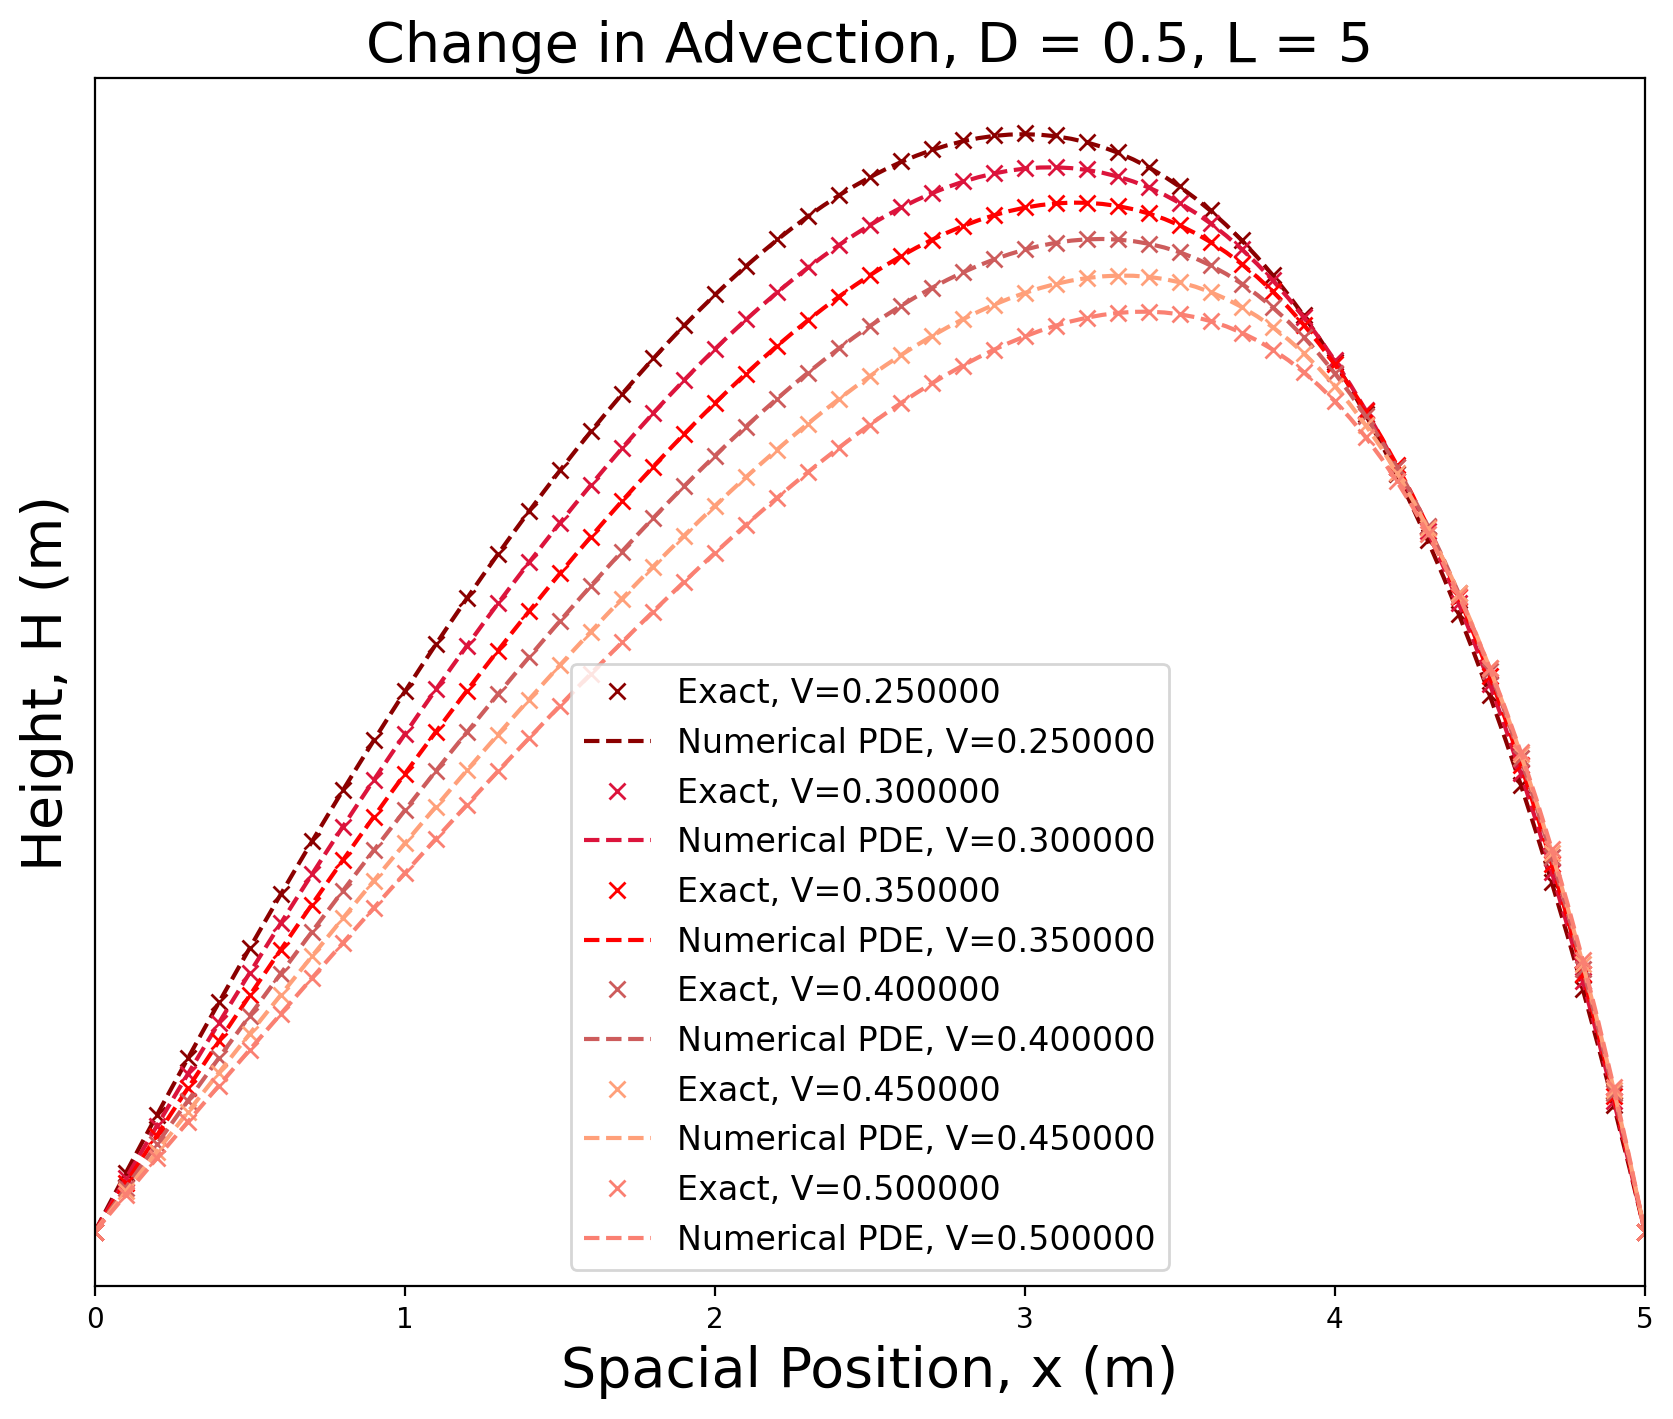

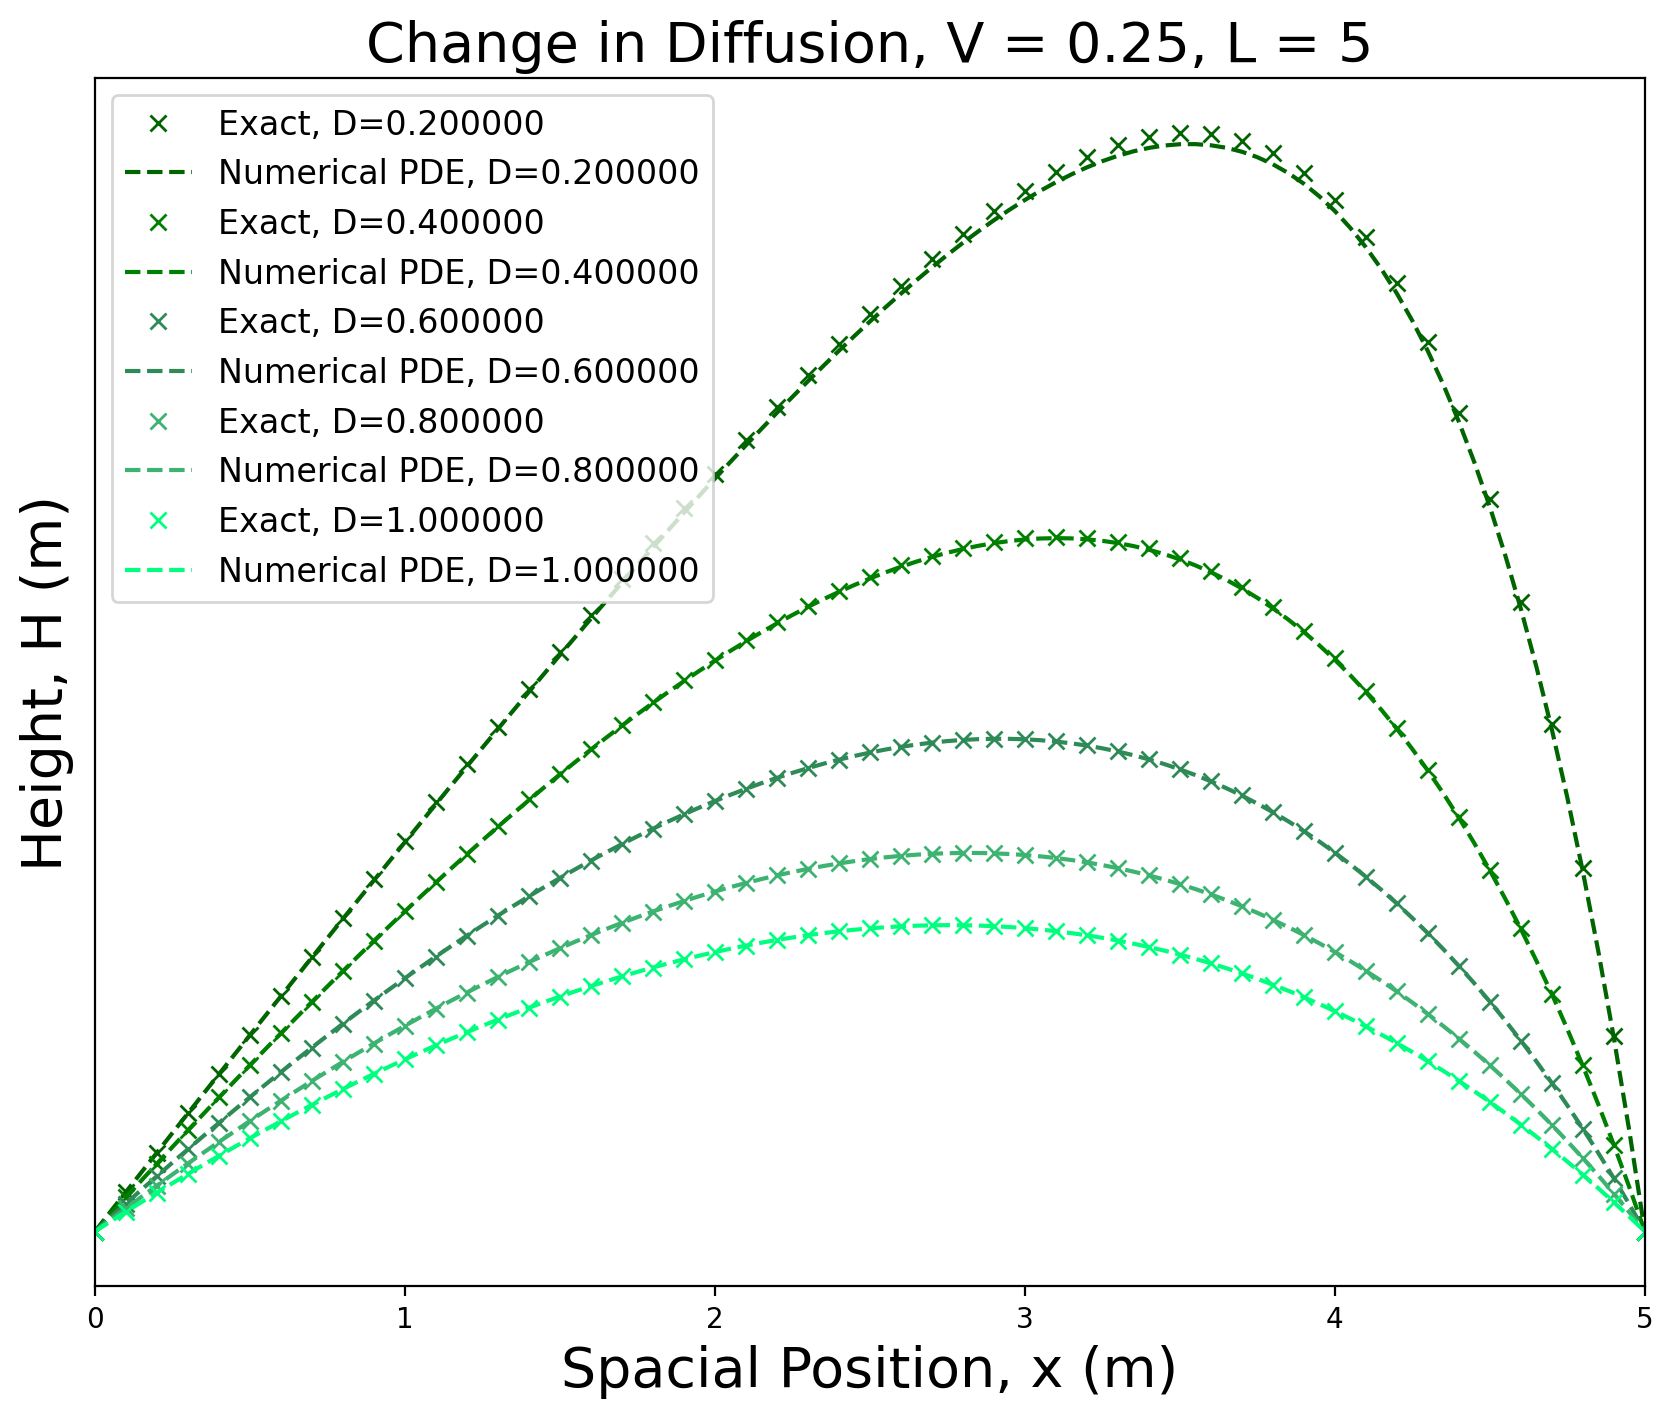

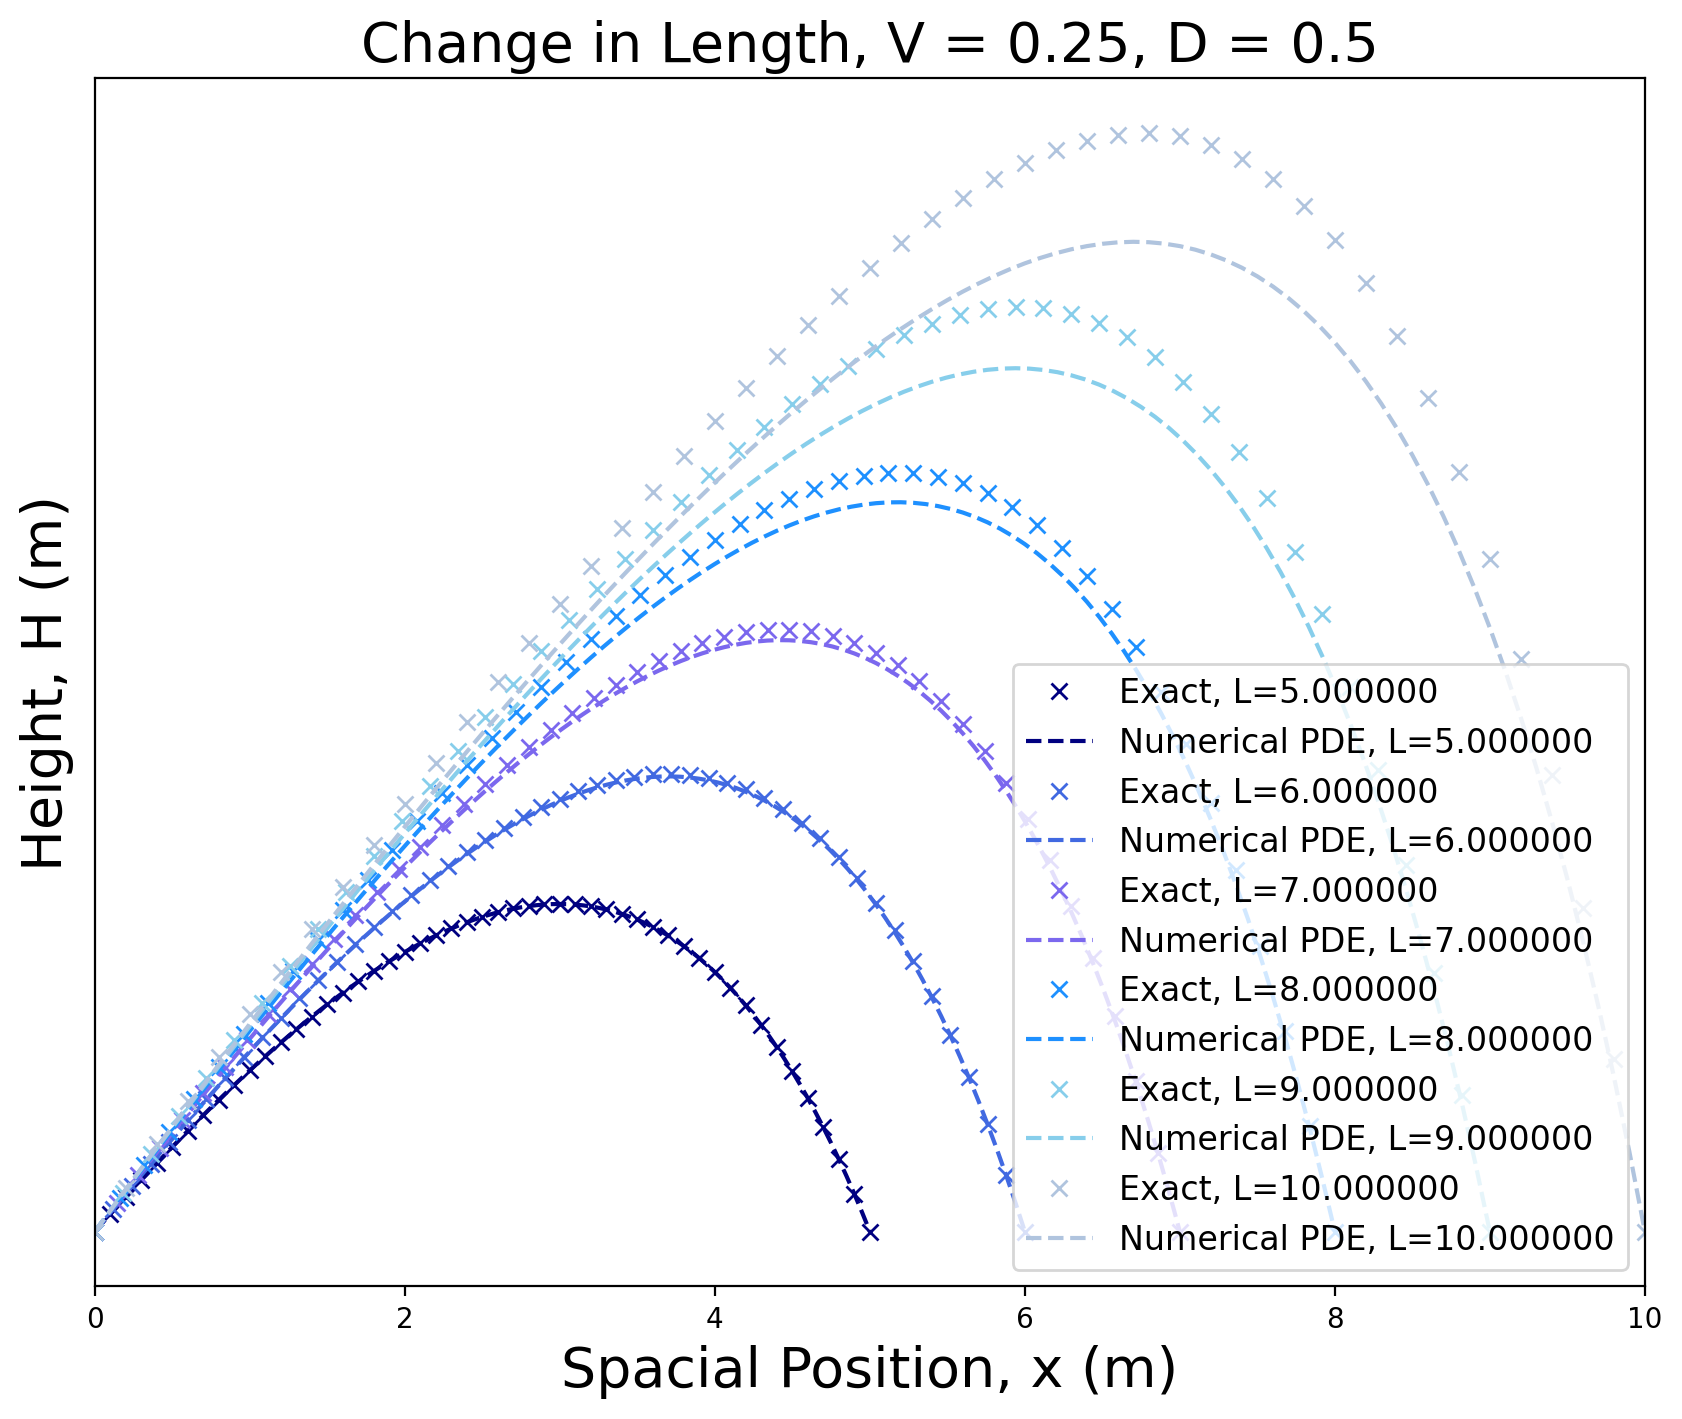

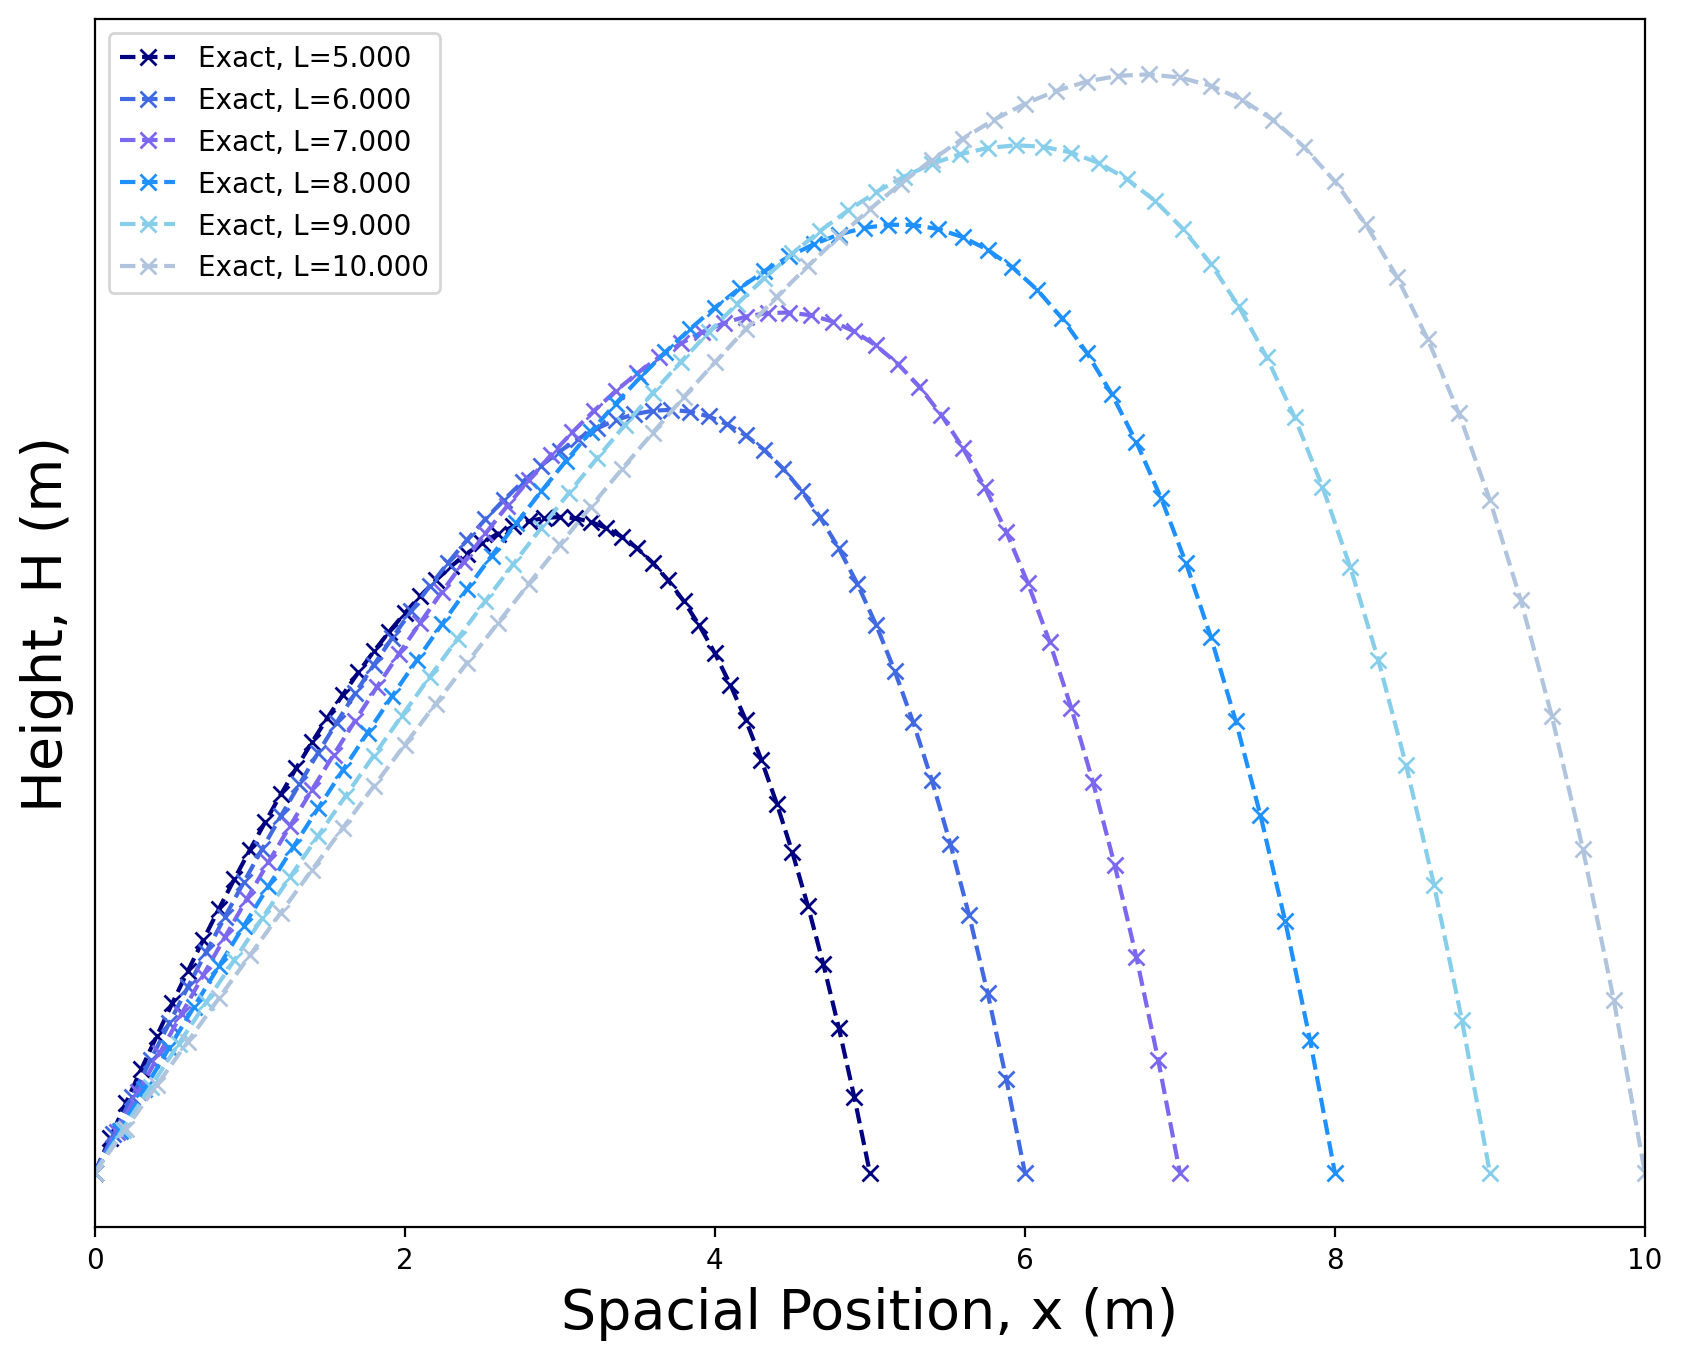

In [17]:


# ===== Steady State Graphs =====

plt.figure(1, figsize=(10, 8), dpi=200)
#define advection speeds
advection = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
for i in range(0, len(advection)):
    label = "Exact, V=" + "%0.6f" % (advection[i])
    x_dots, u_exact = exact(1.0, advection[i], 0.5, 5)
    plt.plot(x_dots, u_exact,color = reds[i], linestyle = '', marker = markers[0], label = label)
            
    label = "Numerical PDE, V=" + "%0.6f" % (advection[i])
    x_pde, u_num = numerical(S_constant, advection[i], 0.5, 5)
    plt.plot(x_pde, u_num[:,-1], color = reds[i], linestyle = 'dashed', label = label)

plt.legend(fontsize=12)
plt.yticks([])
plt.title('Change in Advection, D = 0.5, L = 5', fontsize = 20)
plt.xlim(0,length) # zoom in on area of interest
plt.xlabel('Spacial Position, x (m)', fontsize = 20)
plt.ylabel('Height, H (m)', fontsize = 20)
plt.savefig('Advection Figure 1.png', bbox_inches="tight")

plt.figure(2, figsize=(10, 8), dpi=200)
#define diffusion coefficients 
diffusion = [0.2, 0.4, 0.6, 0.8, 1.0]
for i in range(0, len(diffusion)):
    label = "Exact, D=" + "%0.6f" % (diffusion[i])
    x_dots, u_exact = exact(1.0, 0.25, diffusion[i], 5)
    plt.plot(x_dots, u_exact,color = greens[i], linestyle = '', marker = markers[0], label = label)

    label = "Numerical PDE, D=" + "%0.6f" % (diffusion[i])
    x_pde, u_num = numerical(S_constant, 0.25, diffusion[i], 5)
    plt.plot(x_pde, u_num[:,-1], color = greens[i], linestyle = 'dashed', label = label)

plt.legend(fontsize=12)
plt.yticks([])
plt.title('Change in Diffusion, V = 0.25, L = 5', fontsize=20)
plt.xlim(0,length) # zoom in on area of interest
plt.xlabel('Spacial Position, x (m)', fontsize = 20)
plt.ylabel('Height, H (m)', fontsize = 20)
plt.savefig('Diffusion Figure 1.png', bbox_inches="tight")

plt.figure(3, figsize=(10, 8), dpi=200)
#define lengths
lengths = [5,6,7,8,9,10]
for i in range(0, len(lengths)):
    label = "Exact, L=" + "%0.6f" % (lengths[i])
    x_dots, u_exact = exact(1.0, 0.25, 0.5, lengths[i])
    plt.plot(x_dots, u_exact,color = blues[i], linestyle = '', marker = markers[0], label = label)

    label = "Numerical PDE, L=" + "%0.6f" % (lengths[i])
    x_pde, u_num = numerical(S_constant, 0.25, 0.5, lengths[i])
    plt.plot(x_pde, u_num[:,-1], color = blues[i], linestyle = 'dashed', label = label)

plt.legend(fontsize=12)
plt.yticks([])
plt.title('Change in Length, V = 0.25, D = 0.5', fontsize=20)
plt.xlim(0,max(lengths)) # zoom in on area of interest
plt.xlabel('Spacial Position, x (m)', fontsize = 20)
plt.ylabel('Height, H (m)', fontsize = 20)
plt.savefig('Length Figure 1.png', bbox_inches="tight")


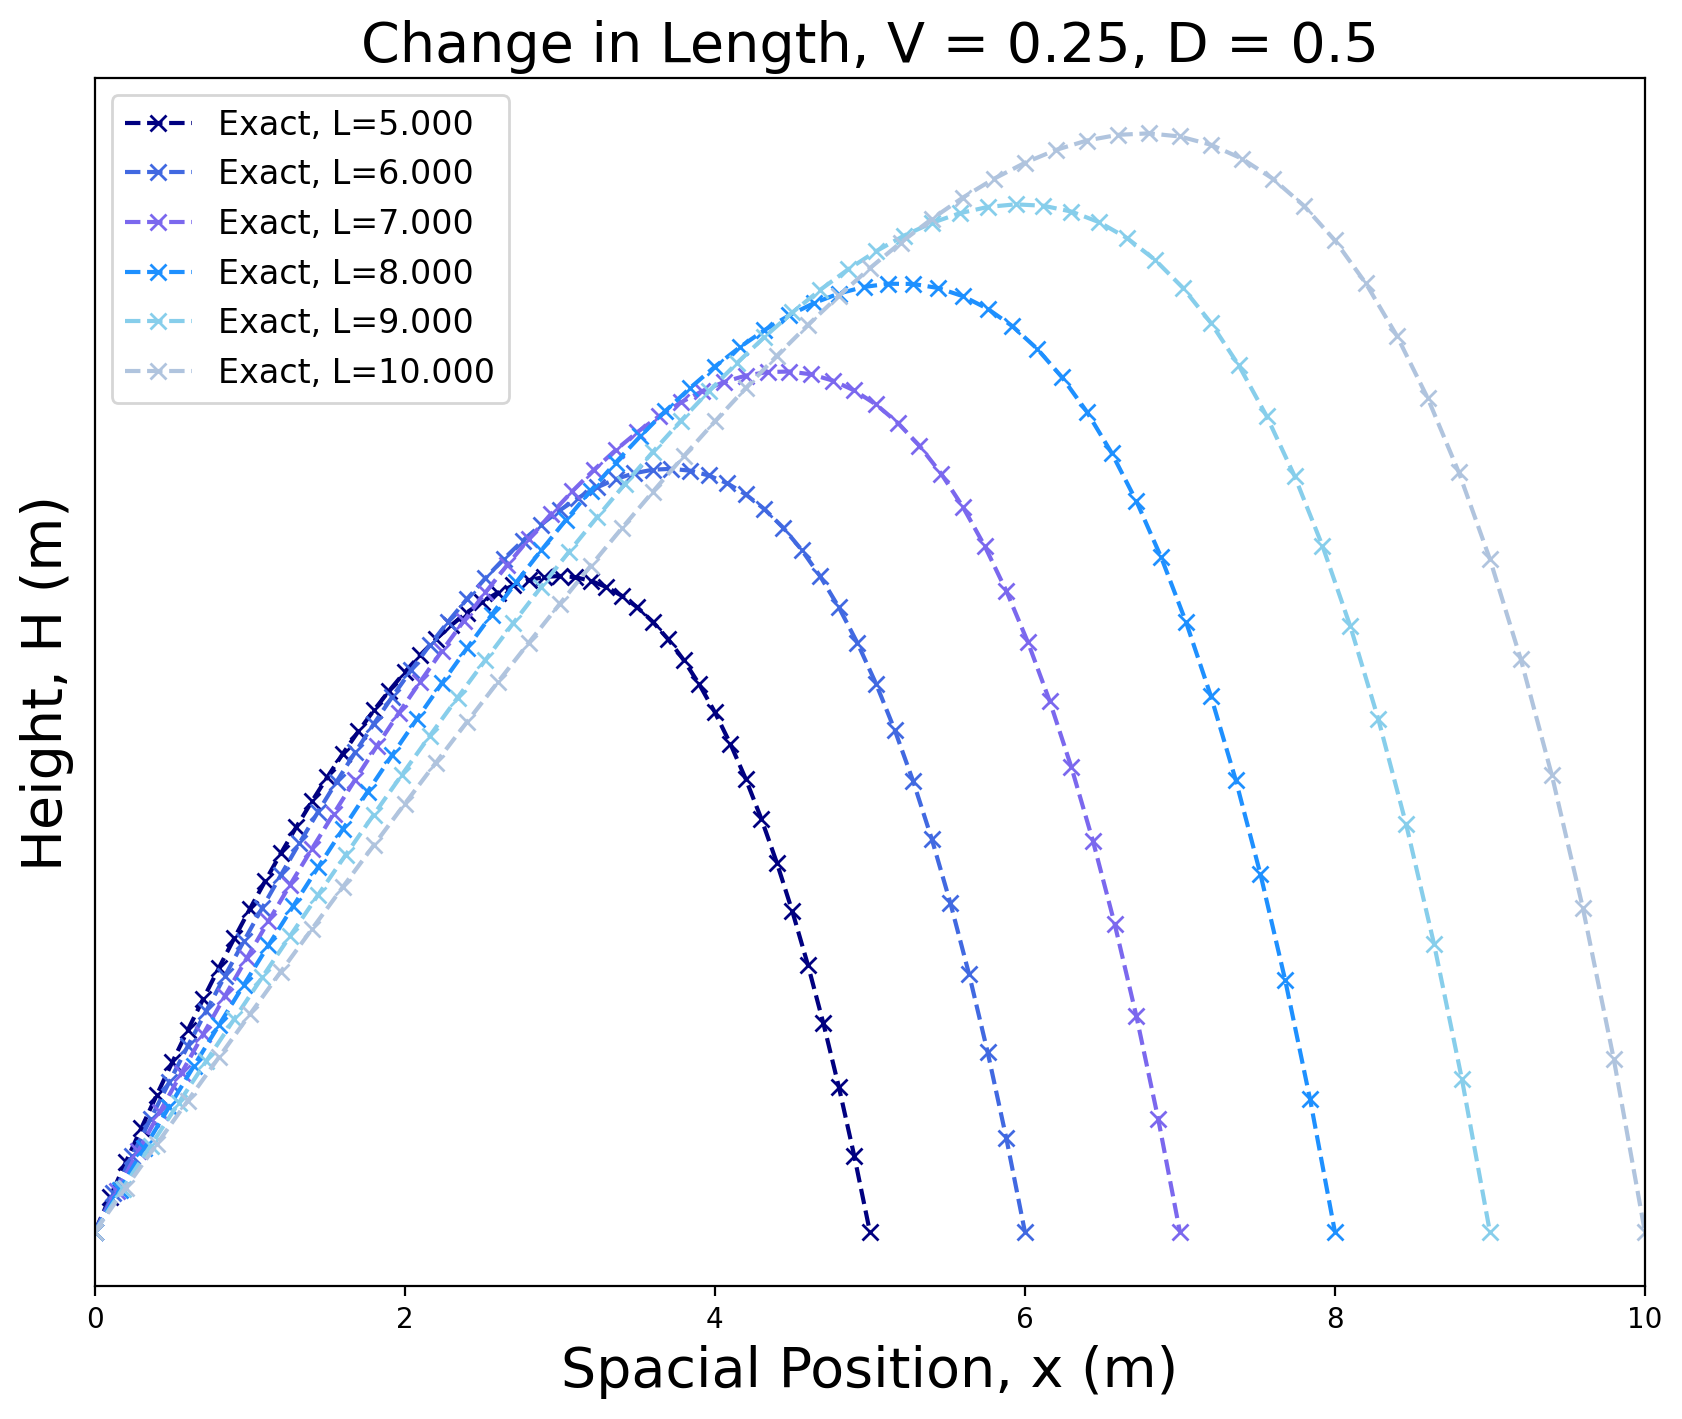

In [21]:

plt.figure(3_2, figsize=(10, 8), dpi=200)
#define lengths
lengths = [5,6,7,8,9,10]
for i in range(0, len(lengths)):
    label = "Exact, L=" + "%0.3f" % (lengths[i])
    x_dots, u_exact = exact(5/lengths[i], 0.25, 0.5, lengths[i])
    plt.plot(x_dots, u_exact,color = blues[i], linestyle = 'dashed', marker = markers[0], label = label)

plt.legend(fontsize=12)
plt.yticks([])
plt.title('Change in Length, V = 0.25, D = 0.5', fontsize=20)
plt.xlim(0,max(lengths)) # zoom in on area of interest
plt.xlabel('Spacial Position, x (m)', fontsize = 20)
plt.ylabel('Height, H (m)', fontsize = 20)
plt.savefig('Length Figure 2.png')



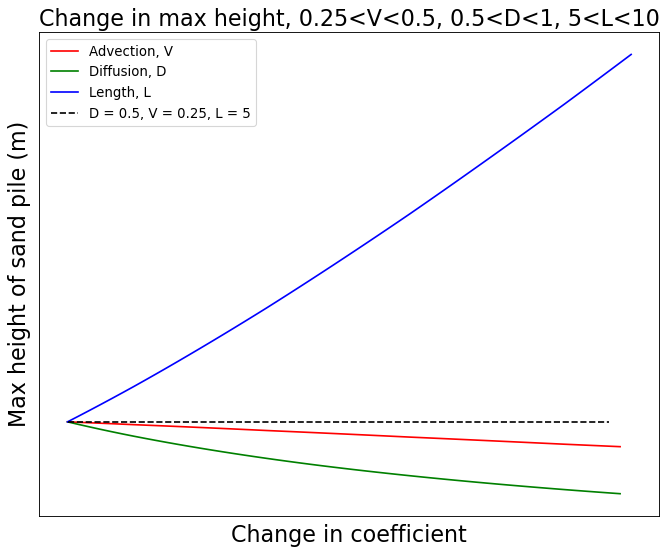

In [19]:
# ===== Max height =====

plt.figure(4, figsize=(10,8), dpi =80)
Nintervals = 50

max_height_adv = []
interval_size = (0.5-0.25)/Nintervals
for v in np.arange(0.25, 0.25 + interval_size*(Nintervals+1), interval_size):
    max_height_adv.append(max(exact(1.0, v, 0.5, length)[-1]))
plt.plot(max_height_adv, label = 'Advection, V', color = 'red')

interval_size = (1.0-0.5)/Nintervals
max_height_diff = []
for d in np.arange(0.5, 0.5 + interval_size*(Nintervals+1), interval_size):
    max_height_diff.append(max(exact(1.0, 0.25, d, length)[-1]))
plt.plot(max_height_diff, label = 'Diffusion, D', color = 'green')

interval_size = (10-5)/Nintervals
max_height_length = []
for l in np.arange(5, 5  + interval_size*(Nintervals+1), interval_size):
    max_height_length.append(max(exact(1.0, 0.25, 0.5, l)[-1]))
plt.plot(max_height_length, label = 'Length, L', color = 'blue')

plt.plot(max(exact(1.0, 0.25, 0.5, length)[-1])*np.ones(Nintervals), linestyle = 'dashed', color='Black', label = 'D = 0.5, V = 0.25, L = 5')
plt.legend(fontsize=12)
plt.title('Change in max height, 0.25<V<0.5, 0.5<D<1, 5<L<10', fontsize=20)
plt.yticks([])
plt.xticks([])
plt.xlabel('Change in coefficient', fontsize = 20)
plt.ylabel('Max height of sand pile (m)', fontsize = 20)
plt.savefig('Figure Height.png', bbox_inches="tight")



<Figure size 2000x1600 with 0 Axes>

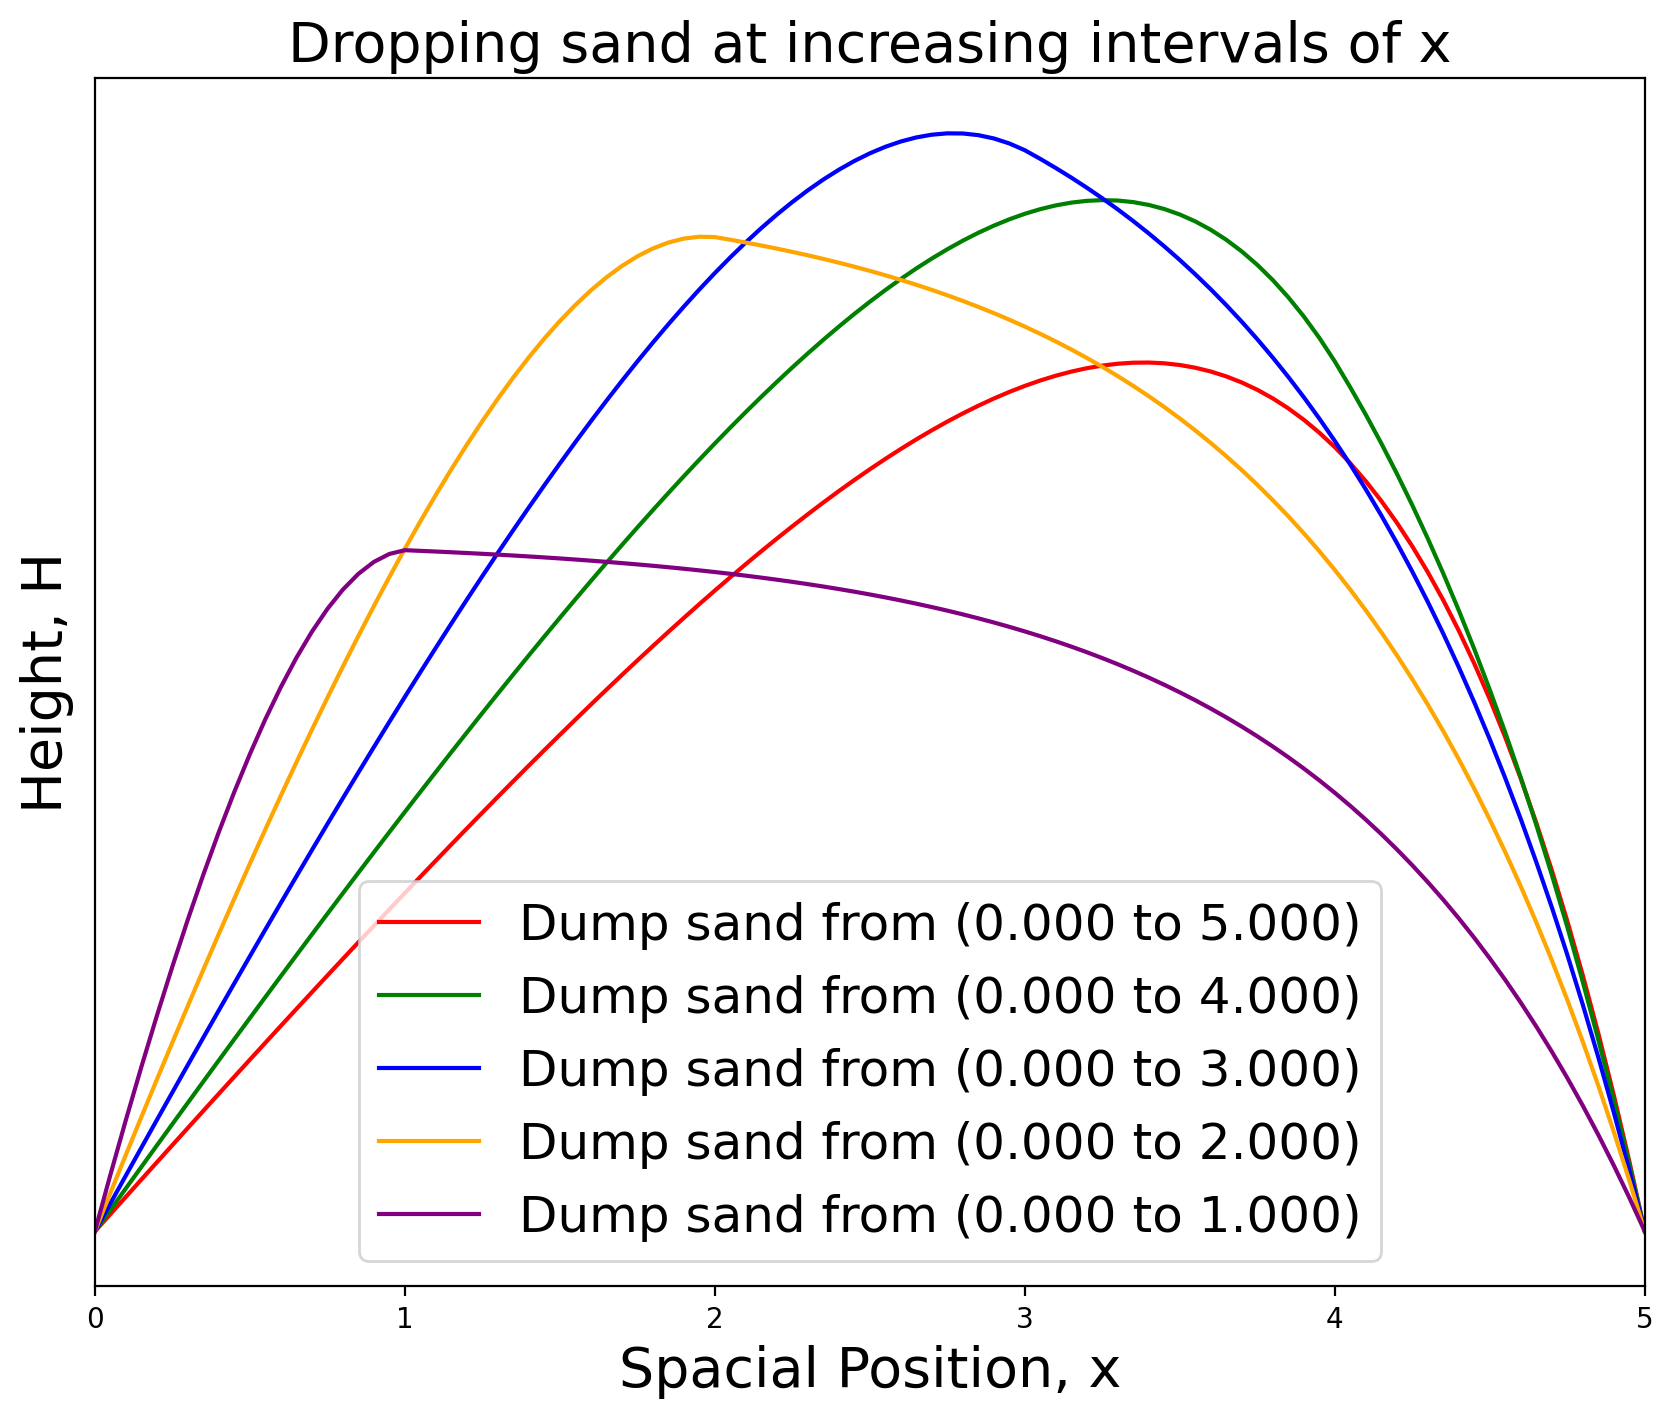

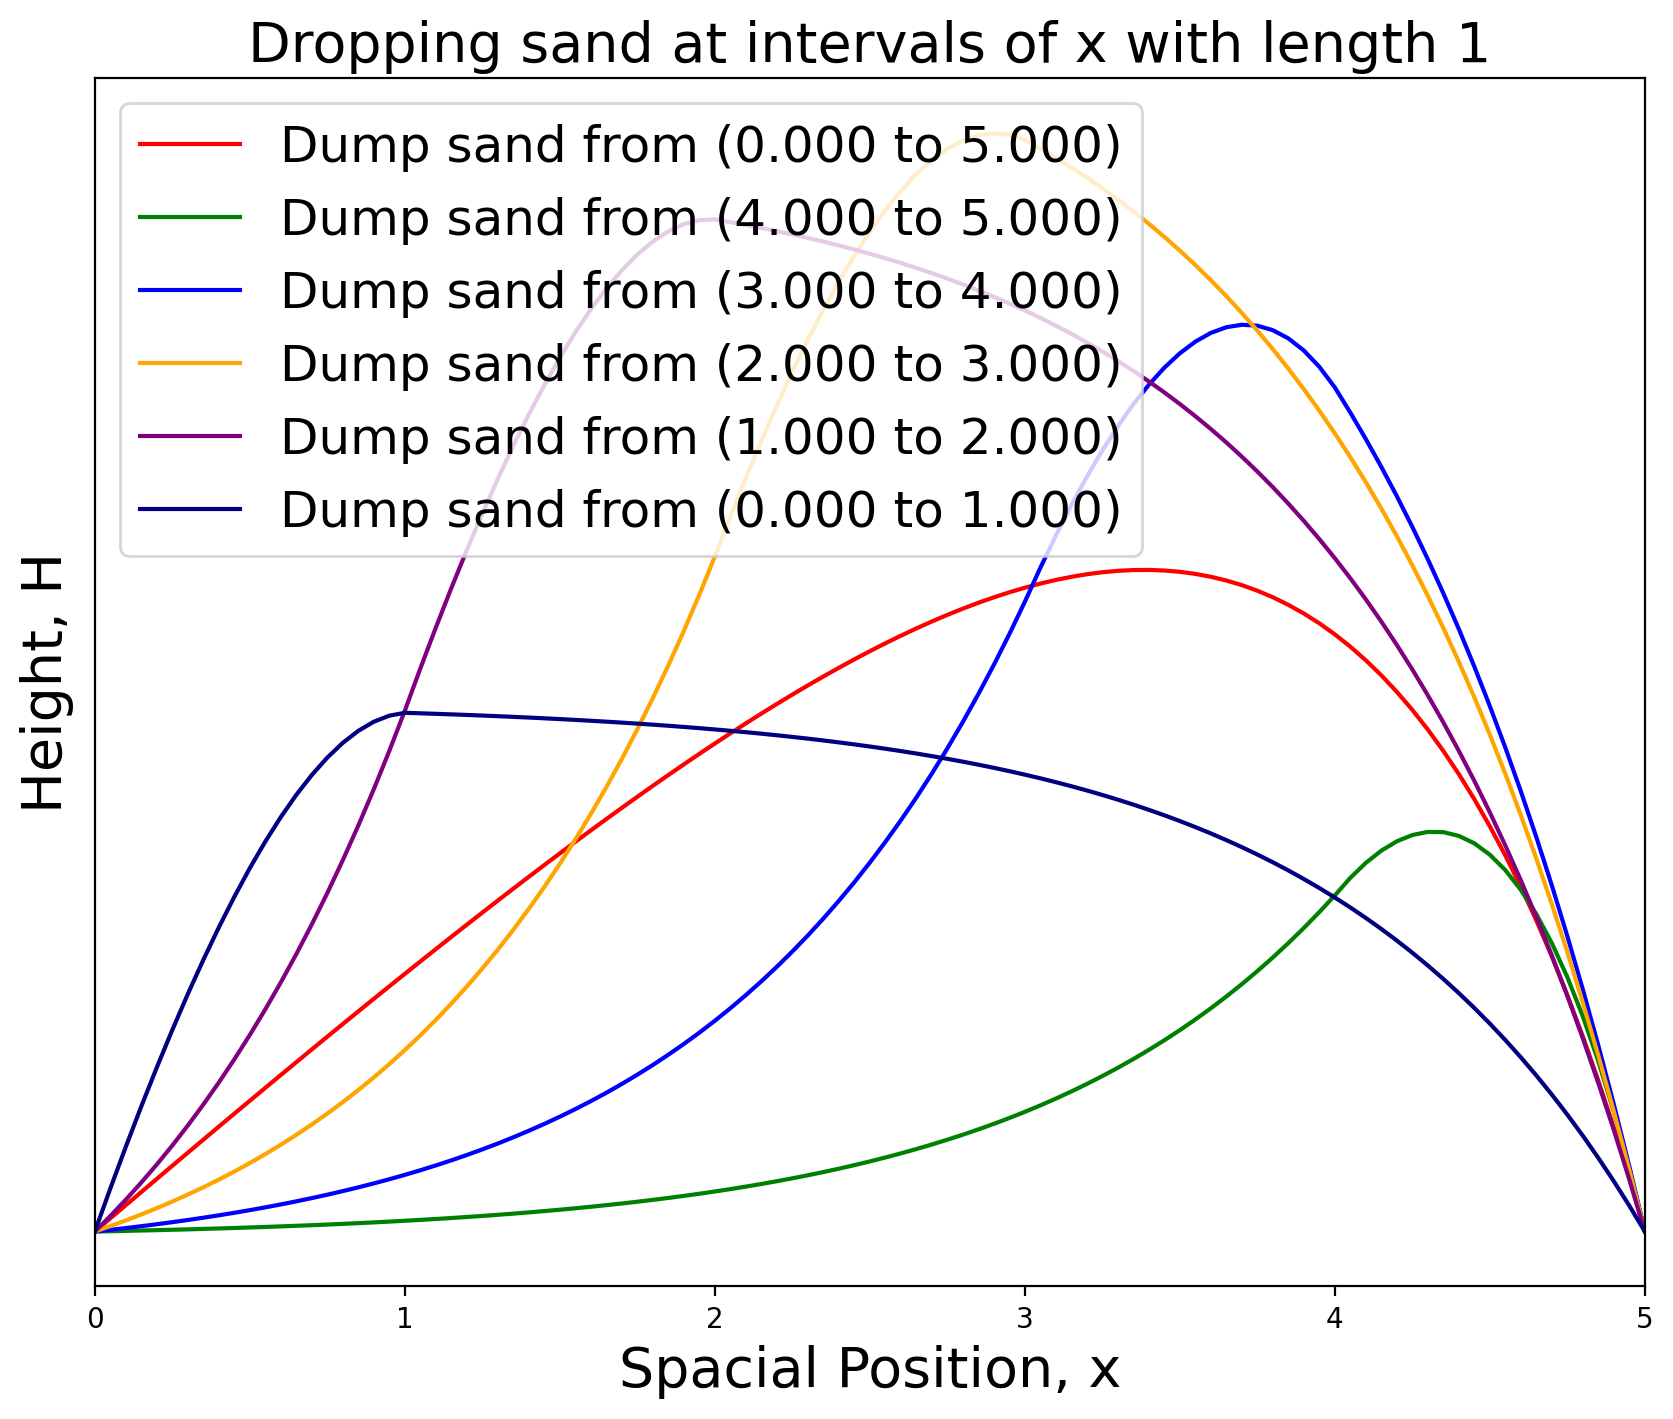

<Figure size 2000x1600 with 0 Axes>

In [199]:
#===== S(x, t) non-constant - Space dependent =====

plt.figure(6, figsize=(10, 8), dpi=200)


xvals = [[0,5],[0,4],[0,3],[0,2],[0,1]]
for i in range(0, len(xvals)):
    xLo, xHi = xvals[i][0], xvals[i][1]
    label = "Dump sand from (" + "%0.3f" % (int(xLo)) + " to " + "%0.3f" % (int(xHi)) + ")"
    x_pde, u_num = numerical(S_linear_space, 0.5, 0.5, 5)
    plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label)

plt.legend(fontsize=18)
plt.yticks([])
plt.xlim(0,length) # zoom in on area of interest
plt.title('Dropping sand at increasing intervals of x', fontsize = 20)
plt.xlabel('Spacial Position, x', fontsize = 20)
plt.ylabel('Height, H', fontsize = 20)
plt.savefig('Sand with intervals of x.png', bbox_inches="tight")


plt.figure(7, figsize=(10, 8), dpi=200)

xvals = [[0,5],[4,5],[3,4],[2,3],[1,2],[0,1]]
for i in range(0, len(xvals)):
    xLo, xHi = xvals[i][0], xvals[i][1]
    label = "Dump sand from (" + "%0.3f" % (int(xLo)) + " to " + "%0.3f" % (int(xHi)) + ")"
    x_pde, u_num = numerical(S_linear_space, 0.5, 0.5, 5)
    plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label)

plt.legend(fontsize=18)
plt.yticks([])
plt.xlim(0,length) # zoom in on area of interest
plt.title('Dropping sand at intervals of x with length 1', fontsize = 20)
plt.xlabel('Spacial Position, x', fontsize = 20)
plt.ylabel('Height, H', fontsize = 20)
plt.savefig('Sand with intervals of x 2.png', bbox_inches="tight")


plt.figure(9, figsize=(10, 8), dpi=200)



In [5]:
xLo, xHi = 0, 5
def S_sin(x, t):
    return 1 + np.sin( (x*6*np.pi)/5 - (np.pi)/2 )

def S_sin_2(x, t):
    return 1 + np.sin( (x*6*np.pi)/5 + (np.pi)/2 )

def S_even(x, t):
    return 5*(2*np.int_(np.int_(x) % 2 == 0))/6

def S_even_2(x, t):
    return 2.5*(np.int_(np.int_(x+1) % 2 == 0))

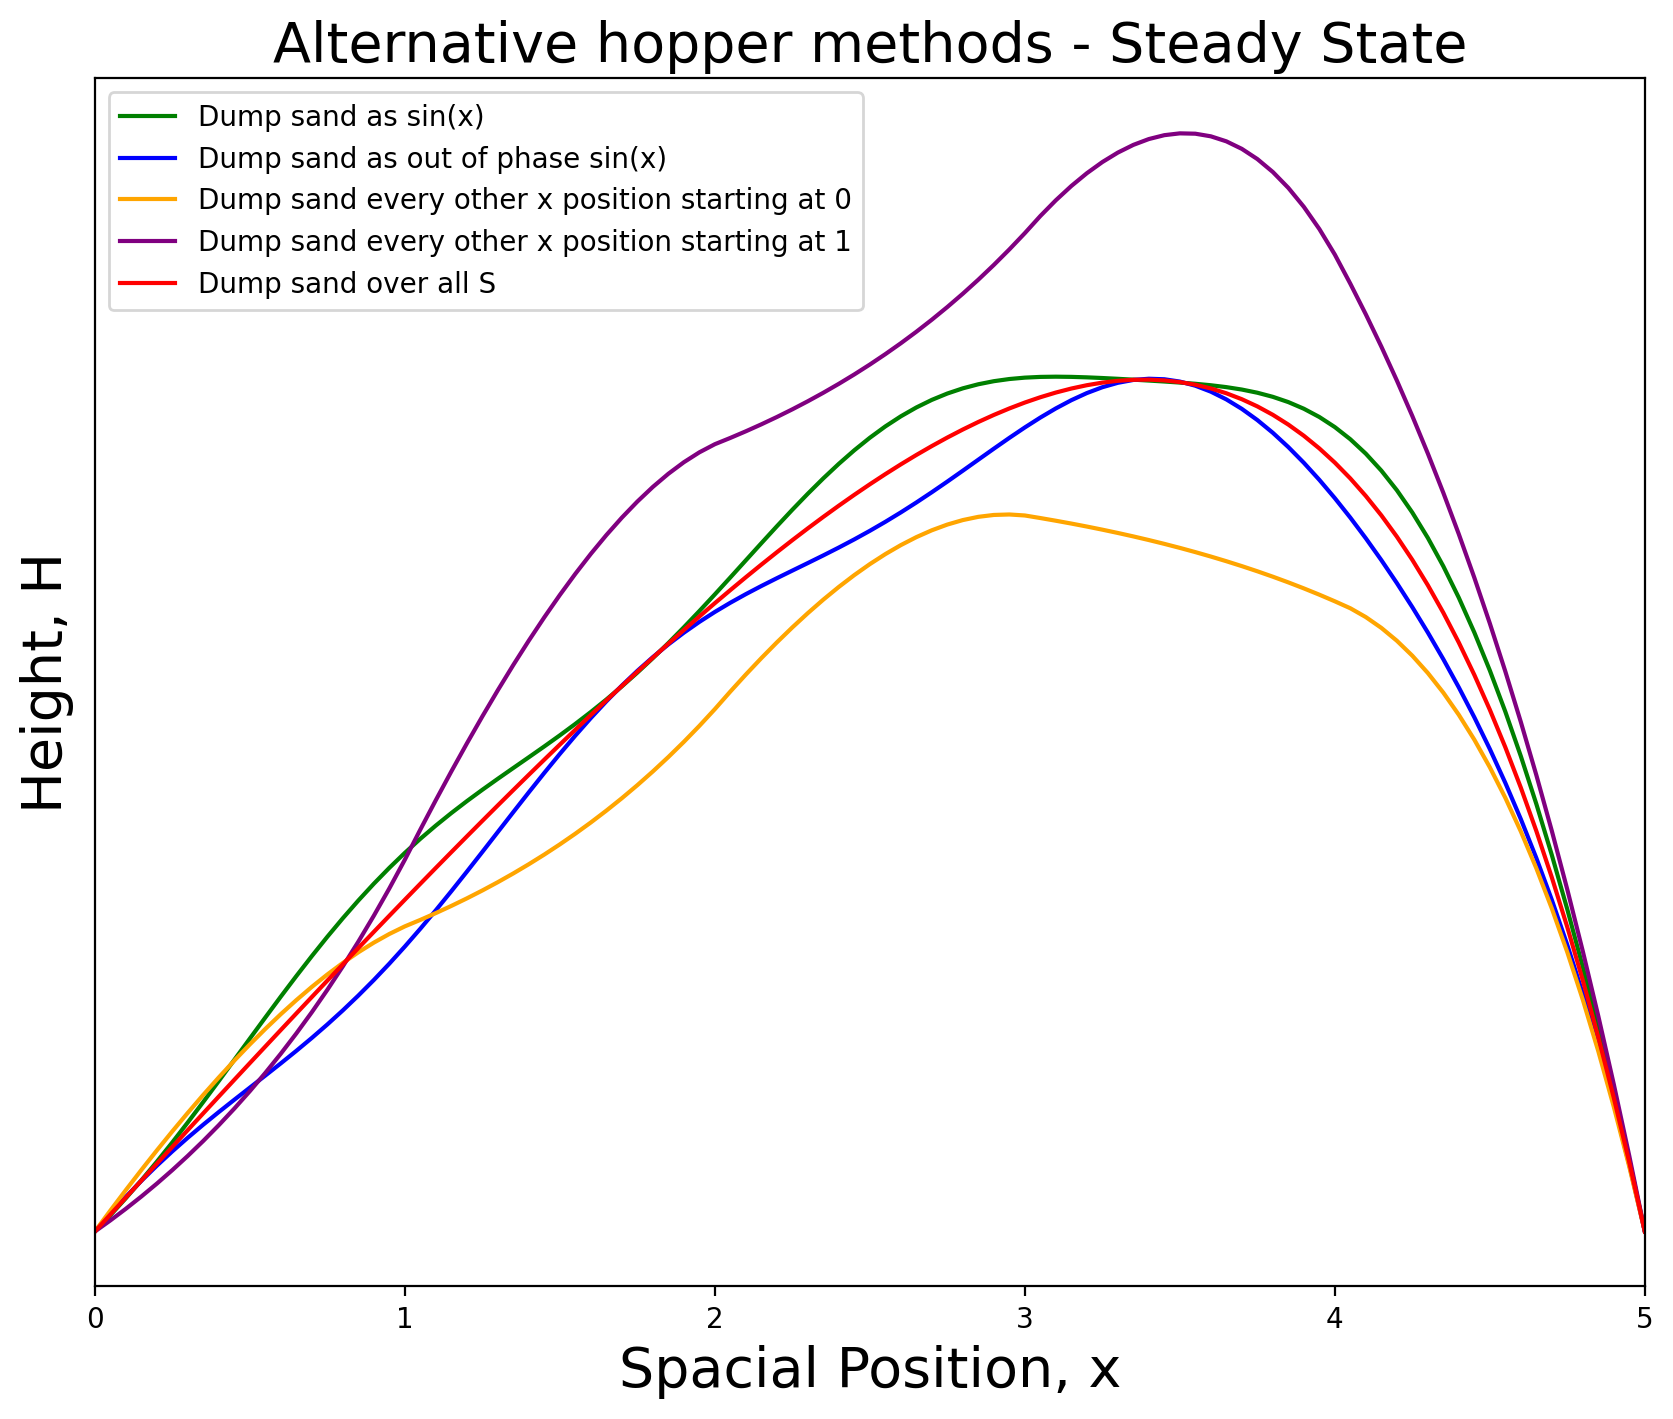

In [29]:


plt.figure(8, figsize=(10, 8), dpi=200)

label = "Dump sand as sin(x)"
x_pde, u_num = numerical(S_sin, 0.5, 0.5, 5)
plt.plot(x_pde, u_num[:,-1], color = colours[1], label = label)

label = "Dump sand as out of phase sin(x)"
x_pde, u_num = numerical(S_sin_2, 0.5, 0.5, 5)
plt.plot(x_pde, u_num[:,-1], color = colours[2], label = label)

label = "Dump sand every other x position starting at 0"
x_pde, u_num = numerical(S_even, 0.5, 0.5, 5)
plt.plot(x_pde, u_num[:,-1], color = colours[3], label = label)

label = "Dump sand every other x position starting at 1"
x_pde, u_num = numerical(S_even_2, 0.5, 0.5, 5)
plt.plot(x_pde, u_num[:,-1], color = colours[4], label = label)

label = "Dump sand over all S"
x_pde, u_num = numerical(S_linear_space, 0.5, 0.5, 5)
plt.plot(x_pde, u_num[:,-1], color = colours[0], label = label)

plt.legend(fontsize=10)
plt.yticks([])
plt.xlim(0,length) # zoom in on area of interest
plt.title('Alternative hopper methods - Steady State', fontsize = 20)
plt.xlabel('Spacial Position, x', fontsize = 20)
plt.ylabel('Height, H', fontsize = 20)
plt.savefig('Sand with x sin.png', bbox_inches="tight")

# #===== S(x, t) non-constant - Time dependent =====

# plt.figure(7, figsize=(10, 8), dpi=200)
# T = 100
# tOn = 2
# def S_variable_time(x, t):
#     if round(t) % tOn == 0 and t < 50:
#         return tOn
#     else:
#         return 0

# tvals = [1, 2, 5, 10, 20]
# for i in range(0, len(tvals)):
#     tOn = tvals[i]
#     label = "Dump sand every " + "%0.3f" % tOn + " time"
#     x_pde, u_num = numerical(S_variable_time, 0.5, 0.5, 5)
#     plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label)

# plt.legend()
# plt.yticks([])
# plt.xlim(0,length) # zoom in on area of interest
# plt.xlabel('Time, t', fontsize = 15)
# plt.ylabel('Height, H', fontsize = 15)
# plt.savefig('Sand with intervals of t.png')

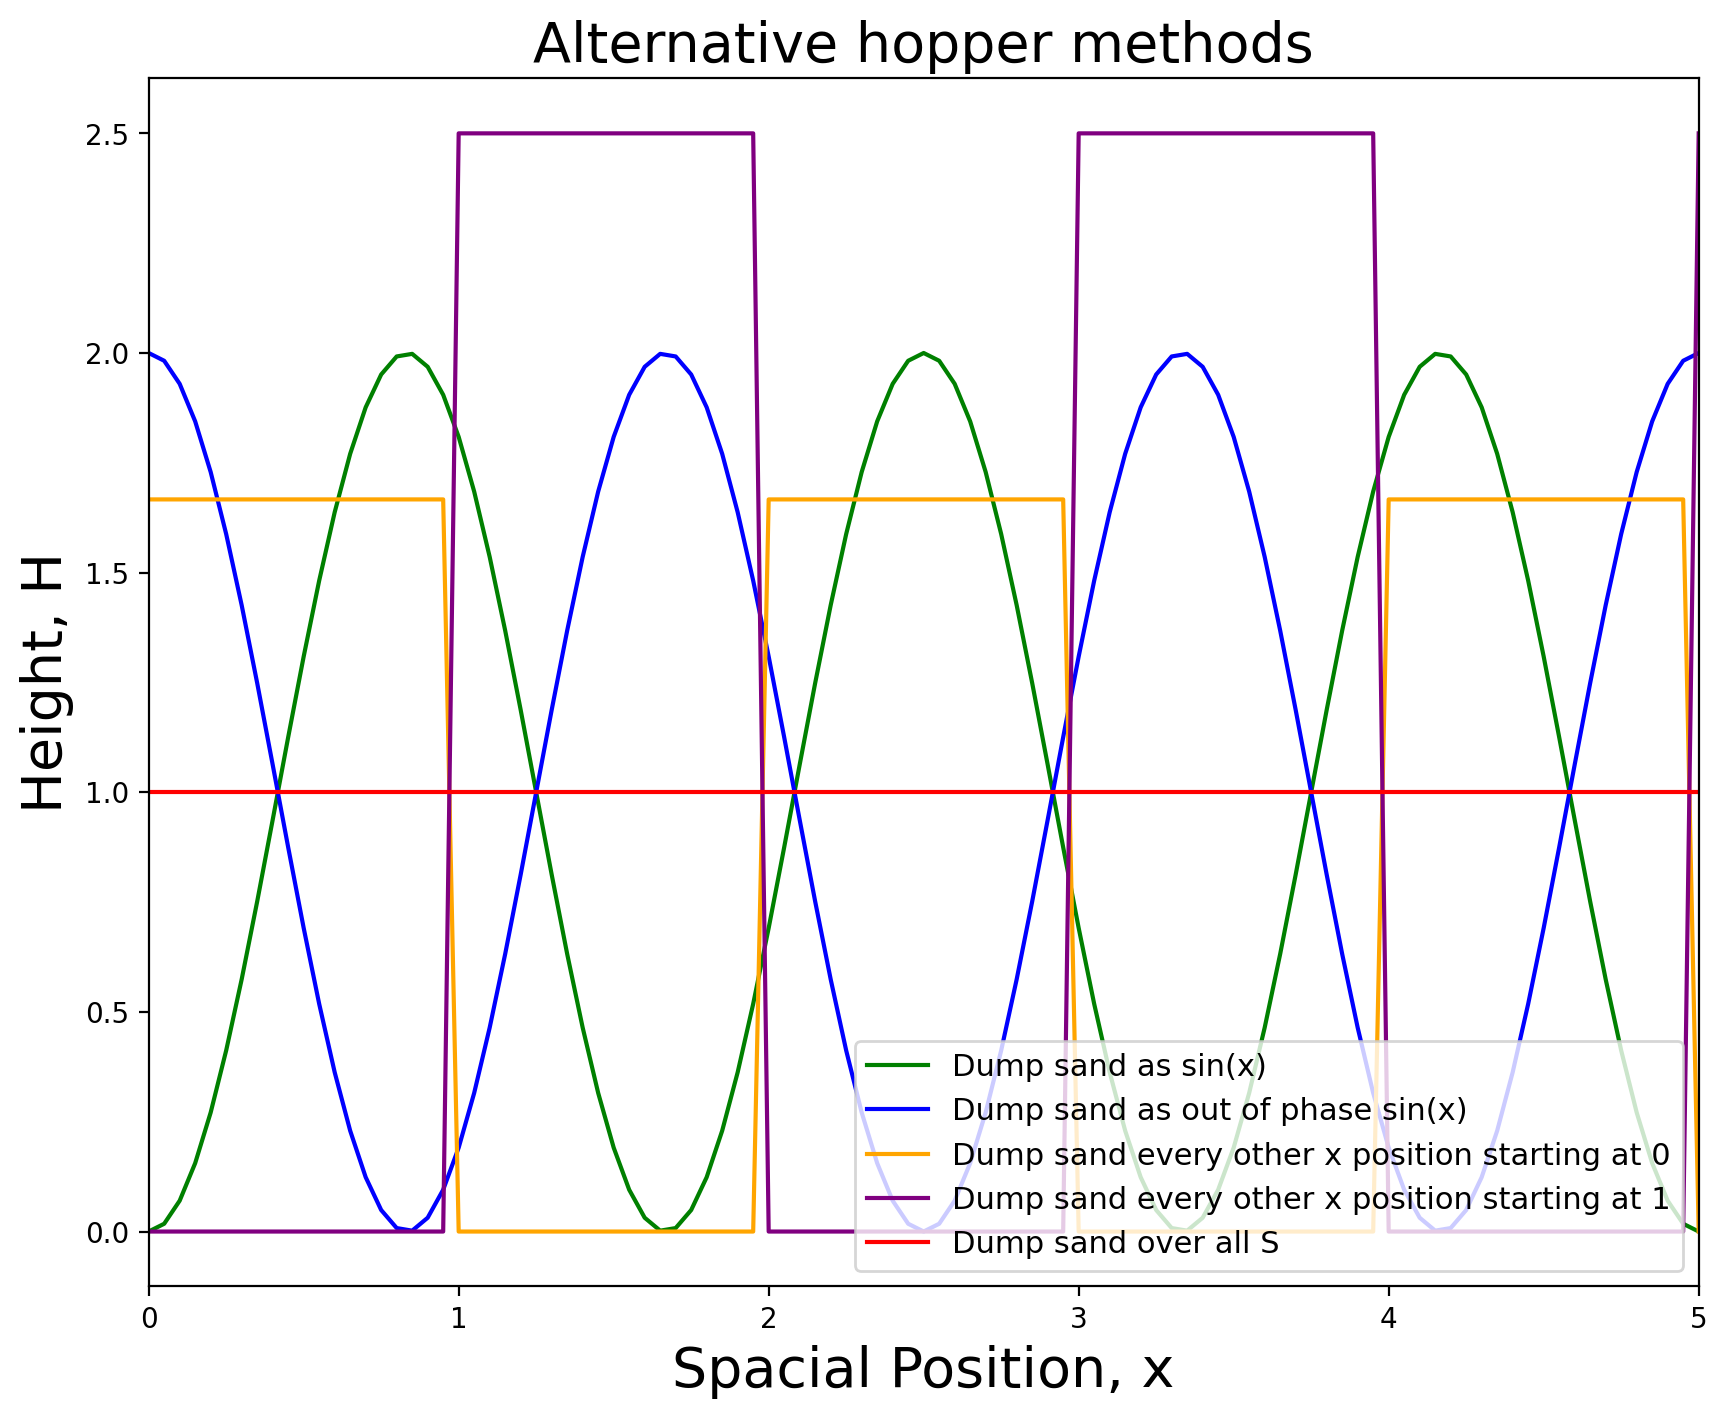

In [28]:
plt.figure(9, figsize=(10, 8), dpi=200)

label = "Dump sand as sin(x)"
plt.plot(x_pde, S_sin(x_pde,t), color = colours[1], label = label)

label = "Dump sand as out of phase sin(x)"
plt.plot(x_pde, S_sin_2(x_pde,t), color = colours[2], label = label)

label = "Dump sand every other x position starting at 0"
plt.plot(x_pde, S_even(x_pde,t), color = colours[3], label = label)

label = "Dump sand every other x position starting at 1"
plt.plot(x_pde, S_even_2(x_pde,t), color = colours[4], label = label)

label = "Dump sand over all S"
plt.plot(x_pde, np.ones(len(x_pde)), color = colours[0], label = label)


plt.legend(fontsize=11, loc = 'lower right')

plt.xlim(0,length) # zoom in on area of interest
plt.title('Alternative hopper methods', fontsize = 20)
plt.xlabel('Spacial Position, x', fontsize = 20)
plt.ylabel('Height, H', fontsize = 20)
plt.savefig('dumnping patterns.png', bbox_inches="tight")


In [186]:


#Dumping on left
xvals = [[0,5],[0,4],[0,3],[0,2],[0,1]]
dt = t[1] - t[0]
#xvals = [[0,5]]
for i in range(0, len(xvals)):
    xLo, xHi = xvals[i][0], xvals[i][1]
    label = "Dump sand from (" + "%0.3f" % (int(xLo)) + " to " + "%0.3f" % (int(xHi)) + ")"
    x_pde, u_num = numerical(S_linear_space, V, D, L)
    d1 = V*u_num[1,-1] - D*((u_num[2,-1] - u_num[1,-1])/(x_pde[1] - x_pde[0]))  
    d2 = V*u_num[-2,-1] - D*((u_num[-1,-1] - u_num[-2,-1])/(x_pde[1] - x_pde[0]))  
    
    d1_total = V*u_num[1,:] - D*((u_num[2,:] - u_num[1,:])/(x_pde[1] - x_pde[0]))  
    
    
    print('interval ', xvals[i])
    print('Final total flux should be close to 5 ',abs(d1)+abs(d2))
    print('Sand lost at T = ',T, ' :',dt*sum(d1_total))

interval  [0, 5]
Final total flux should be close to 5  5.021642624554485
Sand lost at T =  31.41592653589793  : -27.1623770086839
interval  [0, 4]
Final total flux should be close to 5  5.060583848792745
Sand lost at T =  31.41592653589793  : -33.8033174163426
interval  [0, 3]
Final total flux should be close to 5  5.040073722837569
Sand lost at T =  31.41592653589793  : -43.994238413391386
interval  [0, 2]
Final total flux should be close to 5  4.998787793170731
Sand lost at T =  31.41592653589793  : -60.58546827949637
interval  [0, 1]
Final total flux should be close to 5  4.873174626559625
Sand lost at T =  31.41592653589793  : -88.38478117882045


In [97]:
dt

0.05

In [187]:
# Dumping intervals

xvals = [[0,5],[4,5],[3,4],[2,3],[1,2],[0,1]]

dt = t[1] - t[0]
#xvals = [[0,5]]
for i in range(0, len(xvals)):
    xLo, xHi = xvals[i][0], xvals[i][1]
    label = "Dump sand from (" + "%0.3f" % (int(xLo)) + " to " + "%0.3f" % (int(xHi)) + ")"
    x_pde, u_num = numerical(S_linear_space, V, D, L)
    d1 = V*u_num[1,-1] - D*((u_num[2,-1] - u_num[1,-1])/(x_pde[1] - x_pde[0]))  
    d2 = V*u_num[-2,-1] - D*((u_num[-1,-1] - u_num[-2,-1])/(x_pde[1] - x_pde[0]))  
    
    d1_total = V*u_num[1,:] - D*((u_num[2,:] - u_num[1,:])/(x_pde[1] - x_pde[0]))  
    
    
    print('interval ', xvals[i])
    print('Final total flux should be close to 5 ',abs(d1)+abs(d2))
    print('Sand lost at T = ',T, ' :',dt*sum(d1_total))

interval  [0, 5]
Final total flux should be close to 5  5.021642624554485
Sand lost at T =  31.41592653589793  : -27.1623770086839
interval  [4, 5]
Final total flux should be close to 5  4.865877727605618
Sand lost at T =  31.41592653589793  : -0.5986153780524167
interval  [3, 4]
Final total flux should be close to 5  5.122114226654325
Sand lost at T =  31.41592653589793  : -3.2305544251897174
interval  [2, 3]
Final total flux should be close to 5  5.122645582171316
Sand lost at T =  31.41592653589793  : -10.811778681185377
interval  [1, 2]
Final total flux should be close to 5  5.124400959782048
Sand lost at T =  31.41592653589793  : -32.786155380172744
interval  [0, 1]
Final total flux should be close to 5  4.873174626559625
Sand lost at T =  31.41592653589793  : -88.38478117882045


In [189]:
def S_linear_space(x, t):
    if (type(x)==float):
         return 1
    if (type(x)==int):
        return 1
    else:
        return np.ones(len(x))

S_vec = [S_linear_space, S_sin, S_sin_2, S_even, S_even_2]

S_vec


for S in S_vec:
    
    x_pde, u_num = numerical(S, V, D, L)

    d1 = V*u_num[1,-1] - D*((u_num[2,-1] - u_num[1,-1])/(x_pde[1] - x_pde[0]))  
    d2 = V*u_num[-2,-1] - D*((u_num[-1,-1] - u_num[-2,-1])/(x_pde[1] - x_pde[0]))  

    d1_total = V*u_num[1,:] - D*((u_num[2,:] - u_num[1,:])/(x_pde[1] - x_pde[0]))  
    
    
    print('S(x): ', S)
    print('Final total flux should be close to 5 ',abs(d1)+abs(d2))
    print('Sand lost at T = ',T, ' :',dt*sum(d1_total))


S(x):  <function S_linear_space at 0x7f7262a64ee0>
Final total flux should be close to 5  5.021642624554485
Sand lost at T =  31.41592653589793  : -27.1623770086839
S(x):  <function S_sin at 0x7f72632fc9d0>
Final total flux should be close to 5  5.173465510533517
Sand lost at T =  31.41592653589793  : -27.26843634049916
S(x):  <function S_sin_2 at 0x7f725ae92c10>
Final total flux should be close to 5  4.869819738575868
Sand lost at T =  31.41592653589793  : -27.05631767686968
S(x):  <function S_even at 0x7f725afe4700>
Final total flux should be close to 5  4.953899312111996
Sand lost at T =  31.41592653589793  : -33.265058412685235
S(x):  <function S_even_2 at 0x7f725acd7700>
Final total flux should be close to 5  5.123257593218184
Sand lost at T =  31.41592653589793  : -18.008354902681226


1

In [190]:
def exact(s, V, D, L):
    x = np.linspace(0, L, N_dots+1)
    M = np.size(x)
    u_ex = np.zeros(M) 
    for i in range(1,M-1):
        beta = (s*L)/(V*(1-np.exp((V*L)/D)))
        u_ex[i] = beta*(np.exp((V/D)*x[i])-1) + (s/V)*x[i]
        
        #Derivative at 0, L
    dxh = []
    for i in (0, L):
        beta = (s*L)/(V*(1-np.exp((V*L)/D)))
        dxxH = beta * (V/D)**2 * np.exp(V/D * i)
        dxH = (D * dxxH + s) / V
        dxh.append(dxH)
        
    return dxh

exact(1, 0.5, 0.5, 5)

[1.9321634509369576, -8.067836549063044]

In [182]:
# # Where max S(x, t) is 1

# def S_linear_space(x, t):
#     if xLo < x < xHi:
#         return 5.0/(xHi-xLo) 
#     else:
#         return 0.0

# def S_linear_space_sin(x, t):
#     if xLo < x < xHi:
#         return 5.0/(xHi-xLo) * (np.sin(t) + 1)
#     else:
#         return 0.0

# def S_linear_space_cos(x, t):
#     if xLo < x < xHi:
#         return 5.0/(xHi-xLo) * (np.cos(t) + 1)
#     else:
#         return 0.0
    
# def S_linear_space_even(x, t):
#     if xLo < x < xHi and np.round(t) % 2 != 0:
#         return 5.0/(xHi-xLo)
#     else:
#         return 0.0
    
# def S_linear_space_three(x, t):
#     if xLo < x < xHi and np.round(t) % 3 != 0:
#         return 5.0/(xHi-xLo)
#     else: 
#         return 0.0

    

# S_func = [S_linear_space, S_linear_space_sin, S_linear_space_cos, S_linear_space_even, S_linear_space_three]
# labels = ["Constant", "Sine", "Cosine", "On for 1 second, Off for 1 second", "On for 2 seconds, Off for 1 second"]
    
# for i in range(0, len(S_func)):
#     label = labels[i]
#     xLo, xHi = 0, 5
#     x_pde, u_num = numerical(S_func[i], 0.5, 0.5, 5)
#     plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label)

# plt.legend()
# plt.yticks([])
# plt.xlim(0,length) # zoom in on area of interest
# plt.xlabel('Spacial Position, x', fontsize = 15)
# plt.ylabel('Height, H', fontsize = 15)
# plt.title('Delivering sand for different functions of $t$')

# plt.savefig('S with time2.png', bbox_inches='tight')

In [192]:
# def S_linear_space_sin_scaled(x, t):
#     if xLo < x < xHi:
#         return 5.0/(xHi-xLo) * (np.sin(t - (np.pi)/2) + 1) * (0.97258) #constant such that the total integral of sin(t) + 1 between 0 and 30 = 30
#     else:
#         return 0.0

# def S_linear_space_cos_scaled(x, t):
#     if xLo < x < xHi:
#         return 5.0/(xHi-xLo) * (np.cos(t) + 1) * (0.97258) #constant such that the total integral of cos(t) + 1 between 0 and 30 = 30
#     else:
#         return 0.0    
    
# def S_linear_space_even_scaled(x, t):
#     if xLo < x < xHi and np.round(t) % 2 != 0:
#         return 5.0/(xHi-xLo) * 15/7
#     else:
#         return 0.0
    
# def S_linear_space_three_scaled(x, t):
#     if xLo < x < xHi and np.round(t) % 3 != 0:
#         return 5.0/(xHi-xLo) * 3 / 2
#     else: 
#         return 0.0
    
# S_func_scaled = [S_linear_space, S_linear_space_sin_scaled, S_linear_space_cos_scaled, S_linear_space_even_scaled, S_linear_space_three_scaled]
# labels = ["Constant", "Sine", "Cosine", "On for 1 second, Off for 1 second", "On for 2 seconds, Off for 1 second"]
# markers = ["","^", "", "", "", "", ""]
    
# for i in range(0, len(S_func)):
#     label = labels[i]
#     xLo, xHi = 0, 5
#     x_pde, u_num = numerical(S_func_scaled[i], 0.5, 0.5, 5)
#     plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label, marker = markers[i])

# plt.legend()
# plt.yticks([])
# plt.xlim(0,length) # zoom in on area of interest
# plt.xlabel('Spacial Position, x', fontsize = 15)
# plt.ylabel('Height, H', fontsize = 15)
# plt.title('Delivering a fixed volume of sand for different functions of $t$')

# plt.savefig('S scaled with time2.png', bbox_inches='tight')

In [57]:
x_pde, u_num = numerical(S_linear_space_cos_scaled, 0.5, 0.5, 5)
np.max(u_num)

Delta x = 0.05 Delta t =  0.0021467549799530253 p = 0.02146754979953025 r = 0.42935099599060494


5.828837538800033

In [193]:
def S_linear_space_sin_scaled(x, t):
    if xLo < x < xHi:
        return ((np.pi)/2)*(np.sin(t) + 1) #constant such that the total integral of sin(t) + 1 between 0 and 30 = 30
    else:
        return 0.0

def S_linear_space_cos_scaled(x, t):
    if xLo < x < xHi:
        return ((np.pi)/2)*(np.sin(t + np.pi) + 1) #constant such that the total integral of cos(t) + 1 between 0 and 30 = 30
    else:
        return 0.0
    
def S_linear_space_even_scaled(x, t):
    if xLo < x < xHi and np.round(t) % 2 != 0:
        return 5.0/(xHi-xLo) * 2
    else:
        return 0.0
    
def S_linear_space_three_scaled(x, t):
    if xLo < x < xHi and np.round(t) % 3 != 0:
        return 5.0/(xHi-xLo) * 3 / 2
    else: 
        return 0.0
    
S_func_scaled = [S_linear_space, S_linear_space_sin_scaled, S_linear_space_cos_scaled, S_linear_space_even_scaled, S_linear_space_three_scaled]
labels = ["Constant", "Sine", "Cosine", "On for 1 second, Off for 1 second", "On for 2 seconds, Off for 1 second"]
markers = ["","^", "", "", "", "", ""]
    


In [ ]:
# for i in range(0, len(S_func)):
#     label = labels[i]
#     xLo, xHi = 0, 5
#     x_pde, u_num = numerical(S_func_scaled[i], 0.5, 0.5, 5)
#     plt.plot(x_pde, u_num[:,-1], color = colours[i], label = label, marker = markers[i])

# plt.legend()
# plt.yticks([])
# plt.xlim(0,length) # zoom in on area of interest
# plt.xlabel('Spacial Position, x', fontsize = 15)
# plt.ylabel('Height, H', fontsize = 15)
# plt.title('Delivering a fixed volume of sand for different functions of $t$')

# plt.savefig('S scaled with time2.png', bbox_inches='tight')

In [194]:
dt = t[1] - t[0]
for i in range(0, len(S_func)):
    label = labels[i]
    xLo, xHi = 0, 5
    x_pde, u_num = numerical(S_func_scaled[i], 0.5, 0.5, 5)

    d1 = V*u_num[1,-1] - D*((u_num[2,-1] - u_num[1,-1])/(x_pde[1] - x_pde[0]))  
    d2 = V*u_num[-2,-1] - D*((u_num[-1,-1] - u_num[-2,-1])/(x_pde[1] - x_pde[0]))  
    
    d1_total = V*u_num[1,:] - D*((u_num[2,:] - u_num[1,:])/(x_pde[1] - x_pde[0]))  
    
    
    print(label)
    print('Final total flux should be close to 5 ',abs(d1)+abs(d2))
    print('Sand lost at T = ',T, ' :',dt*sum(d1_total))

Constant
Final total flux should be close to 5  5.021642624554485
Sand lost at T =  31.41592653589793  : -27.1623770086839
Sine
Final total flux should be close to 5  6.086719476261595
Sand lost at T =  31.41592653589793  : -43.46493141119377
Cosine
Final total flux should be close to 5  9.68923610199297
Sand lost at T =  31.41592653589793  : -41.86819265332651
On for 1 second, Off for 1 second
Final total flux should be close to 5  6.089689989063187
Sand lost at T =  31.41592653589793  : -27.21863436056997
On for 2 seconds, Off for 1 second
Final total flux should be close to 5  5.317286740742203
Sand lost at T =  31.41592653589793  : -27.07171513376935
